# Twitter Sentiment Analysis

### 1. Import Libraries

Import all the libraries to be used in this notebook. We load the initial libraries at the beginning and keep on adding more libraries as we go along on the project

In [1]:
# Import Libraries

import tweepy # for tweet mining
from textblob import TextBlob # TextBlob - Python library for processing textual data
from wordcloud import WordCloud # WordCloud - Python library for creating image wordclouds
from nltk.sentiment.vader import SentimentIntensityAnalyzer #  lexicon and rule-based sentiment analysis tool
import pandas as pd # for data manipulation and analysis
import numpy as np # for working with arrays and carrying out mathematical operations.
import re # In-built regular expressions library
import os # to access environment from the operating system 
import string # Inbuilt string library
import glob # to retrieve files/pathnames matching a specified pattern. 
import matplotlib.pyplot as plt  # for plotting
import alpaca_trade_api as tradeapi
from datetime import datetime, timedelta
import hvplot.pandas
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
from dotenv import load_dotenv  # loading the  environment 

In [3]:
# Loading Environment from the operating system
load_dotenv()

True

In [4]:
# Natural Language Processing Toolkit
import nltk
import spacy
import emoji
import stop_words
# Tokenize - large quantity of text is divided into smaller parts 
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk import pos_tag # For Parts of Speech tagging
from collections import Counter # count the key-value pairs
from spacy import displacy # dependency visualizer that show model's predictions
nlp = spacy.load("en_core_web_sm") # English pipeline optimization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
# ML Toolkit 

# (Ensembled Learning)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans


from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier


# (Linear Regression)
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

# (Tensor Flow)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

### 2. Tweets Mining

We are using the Tweepy library for Python to scrape tweets. We created a developer account with Twitter to get the keys used below for this task.

In [6]:
# Get the API keys from env

consumer_key = os.getenv("TWITTER_API_KEY")
consumer_secret_key = os.getenv("TWITTER_API_SECRET_KEY")
access_token = os.getenv("TWITTER_ACCESS_TOKEN")
access_token_secret = os.getenv("TWITTER_ACCESS_TOKEN_SECRET")

# Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret_key)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [7]:
# checking the API keys validate or not

In [8]:
#type(consumer_key)

In [9]:
#type(consumer_secret_key)

In [10]:
#type(access_token)

In [11]:
#type(access_token_secret)

#### User-defined Functions for Tweets Mining

We created a functions for searching with different phrases, Example "EV Stock", "Best EV Stock", "EV Stock Future", "Top EV Maker". We do  different searches and each result store in a csv file. This is because we can be consistant with the data as we work along. 

In [12]:
def write_df_to_csv(df, file_name):
    df.to_csv(file_name, index=False)

In [13]:
def getTweets():
    keyword = input("Please enter keyword or hashtag to search: ")
    noOfTweet = int(input ("Number of tweets to analyze: "))
    tweet_list = []
    # Collect tweets using the Cursor object
    tweets = tweepy.Cursor(api.search, 
                           q=keyword, 
                           keyword = keyword + "  -filter:links AND -filter:retweets AND -filter:replies", 
                          lang="en",
                          tweet_mode='extended' ).items(noOfTweet)
     # Each item in the iterator has various attributes that you can access to get information about each tweet
    for tweet in tweets:
        tweet_list.append([
            tweet.id,
            tweet.created_at,
            tweet.full_text,
            tweet.user.location,
            tweet.retweet_count,
            tweet.favorite_count
        ])
    return tweet_list

In [14]:
# tweet_list = getTweets()

In [15]:
# tweet_list_df = pd.DataFrame(tweet_list,columns=["Id","Date", "Tweets","Location","Retweets","Favorite"])
# tweet_list_df.head()

In [16]:
# tweet_list_df.shape

In [17]:
### USE DIFFERENT FILE NAME TO SAVE EACH SEARCH. OR else it will replace the previous data
# write_df_to_csv(tweet_list_df,"EV_best_2_tweet.csv")

In [18]:
## read_csv with new search data to check. We do not need these lines .. 
## it is just to check if how may tweets we are getting. 

In [19]:
# stock_tweet = pd.read_csv("EV_Stock_tweet.csv")

In [20]:
#stock_tweet.shape

In [21]:
#pwd

#### Combining all Tweets into single Pandas Dataframe

In [22]:
## commenting these lines as we got the tweets and save it to a csv

In [23]:
#path = "/Users/syedahasan/Desktop/EV_Sentiment_Trading"
##all_files = glob.glob(path + "/*.csv")
#all_files

In [24]:
#tweets = []

#for filename in all_files:
#    df = pd.read_csv(filename,  index_col=None, parse_dates=True,  header=0) # Convert each csv to a dataframe
#    tweets.append(df)

#tweets_df = pd.concat(tweets, axis=0, ignore_index=True) # Merge all dataframes
#tweets_df['Date']= pd.to_datetime(tweets_df['Date'])
#tweets_df.head()

In [25]:
# Write all tweets in one csv
# write_df_to_csv(tweets_df,"EV_ALL_TWEETS.csv")

In [26]:
tweets_df = pd.read_csv("EV_ALL_TWEETS.csv",  index_col=None, parse_dates=True,  header=0) 

In [27]:
tweets_df['Date']= pd.to_datetime(tweets_df['Date']).dt.normalize() # changing date time to date
tweets_df.head()

Id       Date  \
0  1420544025631760384 2021-07-29   
1  1420519469865177088 2021-07-28   
2  1419726996104486919 2021-07-26   
3  1419703662092472320 2021-07-26   
4  1419665554038681606 2021-07-26   

                                              Tweets               Location  \
0  @ev_truths @alex_avoigt I think EV technology ...            Seattle, WA   
1  Compact International(1994) Wants to be Top EV...                  U.S.A   
2  RT @cliffski: Toyota are not much better than ...         Louisville, KY   
3  Toyota are not much better than volkswagen. Th...  None of your business   
4  GM China’s Venture Has Big Ambitions Beyond $4...   Vancouver and London   

   Retweets  Favorite  
0         0         0  
1         0         0  
2         2         0  
3         2         4  
4         0         0

In [28]:
tweets_df.dtypes

Id                   int64
Date        datetime64[ns]
Tweets              object
Location            object
Retweets             int64
Favorite             int64
dtype: object

### 3. Data Cleaning

The dataframe that is created on above, will be cleaned in this section. We are going to search for any duplication and will remove it. It is also important to mention that the Tweet ID was considered as the Primary key for all the dataframe. We are also going to replace the "NaN" values in Location column.

In [29]:
#Get number of rows and columns
tweets_df.shape 

(12676, 6)

In [30]:
tweets_df.duplicated(subset='Tweets').sum() # Check for duplicate values

4786

In [31]:
# drop duplicate values
tweets_df=tweets_df.drop_duplicates(subset='Tweets',keep="last") 

In [32]:
# Check the shape after dropping duplicates
tweets_df.shape 

(7890, 6)

In [33]:
# Check for "NaN" values
tweets_df.isna().any() 

Id          False
Date        False
Tweets      False
Location     True
Retweets    False
Favorite    False
dtype: bool

In [34]:
# Replace "NaN" values with "No Location"
tweets_df['Location']=tweets_df['Location'].fillna('No location') 

In [35]:
# Check for "NaN" values again
tweets_df.isna().any() 

Id          False
Date        False
Tweets      False
Location    False
Retweets    False
Favorite    False
dtype: bool

### 4. Processing

The Individual Tweer needed to be cleaned. We are using several functions to clean the tweet and to show the words used. We are extracting only the adjectives to a new column to view the weight.

In [36]:
# NLTK list of stopwords
from nltk.corpus import stopwords

In [37]:
# Lemmatization is a technique that transforms various morphologies of a word into its base form. 
from nltk.stem import WordNetLemmatizer 
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [38]:
def clean_tweet(text):
    text = text.lower()  #has to be in place
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions
    text = re.sub(r'#', '', text)  # Remove # symbol
    text = re.sub(r'$', '', text)  # Remove $ symbol
    text = re.sub(r'RT[\s]+','', text) # Remove RT
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove urls
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove hyperlink
    text = re.sub(r':','', text)
   
    sw = set(stopwords.words('english'))
    sw_addons = {'do', 'of', '$','r', '*,*','-',', ','``','\'s','.','-','public','rt',
                 'company', 'instead','&','’', 'in', 'car','they','\'your', 'what', 'also', 'seeing','agreement',
                 'time','today','ktown','pc','wts','105k','55k','ed','seeing','takeover','brokerages','rap','meet',
                 'vehicle','market','year','news','price','med','lpo','make',
                 'bakersfieldcart','takeaway','late','catching','lates','ranges'}
    words = word_tokenize(text)
    output = [x.lower() for x in words if x.lower() not in sw.union(sw_addons)]
    # Remove punctuations
    unpunctuated_words = [char for char in output if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)
    
    #return output
    
    return "".join(unpunctuated_words)  # join words with a space in between them

In [39]:
def give_emoji_free_text(text): 
    return emoji.get_emoji_regexp().sub(r'', text)


In [40]:
def sanitize(string):
    """ Sanitize one string """
    emoticon_string = r"""
        (?:
          [<>]?
          [:;=8]                     # eyes
          [\-o\*\']?                 # optional nose
          [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth      
          |
          [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
          [\-o\*\']?                 # optional nose
          [:;=8]                     # eyes
          [<>]?
        )"""
    stopwords = [w.lower() for w in stop_words.get_stop_words('en')]
    # remove graphical emoji
    string = give_emoji_free_text(string) 

    # remove textual emoji
    string = re.sub(emoticon_string,'',string)

    # normalize to lowercase 
    string = string.lower()

    # spacy tokenizer 
    string_split = [token.text for token in nlp(string)]

    # in case the string is empty 
    if not string_split:
        return '' 

    # join back to string 
    string = ' '.join(string_split)

    # remove user 
    # assuming user has @ in front
    string = re.sub(r"""(?:@[\w_]+)""",'',string)

    #remove # and @
    for punc in '":!@#':
        string = string.replace(punc, '')

    # remove 't.co/' links
    string = re.sub(r'http//t.co\/[^\s]+', '', string, flags=re.MULTILINE)

    # removing stop words 
    string = ' '.join([w for w in string.split() if w not in stopwords])
    string = re.sub(r"http\S+", "", string)
    return string

In [41]:
#print(tweets_df['Tweets'])

In [42]:
#print(sanitize(tweets_df['Tweets'][12671]))

In [43]:
tweets_df['Tweets'] = tweets_df['Tweets'].apply(sanitize)

In [44]:
 # remove one and two character words
tweets_df['Tweets'] = tweets_df['Tweets'].apply(lambda x: re.sub(r'\b\w{1,3}\b', '', x))
# remove punctuation
tweets_df['Tweets'] = tweets_df['Tweets'].apply(lambda x: re.sub('[^\w\s]', ' ', x))
# remove numerical values
tweets_df['Tweets'] = tweets_df['Tweets'].apply(lambda x: re.sub(r'[0-9]+', '', x))
# \s+ means all empty space (\n, \r, \t)
tweets_df['Tweets'] = tweets_df['Tweets'].apply(lambda x: re.sub('\s+', ' ', x))
    

In [45]:
#tweets_df['Tweets']

In [46]:
tweets_df['Processed_Tweets'] = tweets_df['Tweets'].apply(clean_tweet)

In [47]:
#print(tweets_df['Processed_Tweets'][12671])

In [48]:
#tweets_df['Processed_Tweets']

In [49]:
# Helper functions
def all_noun(tweet):
    """
    This function retrieves all the nouns on the given text.
    
    Args:
        text (string): The text to analyze.
        
    Returns:
        nouns (list): A list with all the nouns in the text.
    """
   
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "NN"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [50]:
# Helper functions
def all_adjectives(tweet):
    """
    This function retrieves all the adjectives on the given text.
    
    Args:
        text (string): The text to analyze.
        
    Returns:
        adjs (list): A list with all the adjectives in the text.
    """
   
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [51]:
# Apply all_noun function to the new 'Processed Tweets' column to generate a new column called 'Tweets_Nouns'
tweets_df['Tweets_Nouns'] = tweets_df['Processed_Tweets'].apply(all_noun)

In [52]:
tweets_df['Tweets_Adjectives'] = tweets_df['Processed_Tweets'].apply(all_adjectives)

In [53]:
def get_word_counts(t, w):
    """
    This function counts the occurrences of a word in a text.
    
    Args:
        text (string): The text where word counts will be analyzed.
        word (string): The word to look into the text.
        
    Returns:
        word_count (int): The counts of the word in the given text.
    """
    
    # Use the word_tokenize module from NLTK to tokenize the text
    tok = word_tokenize(t)
    
    # Create a list with all the tokens retrieved from the text
    tok = [w.lower() for w in tok]
    
    # Count the occurrences of the word in the text
    word_count = tok.count(w)
    
    return word_count

In [54]:
# function to return words to their base form using Lemmatizer
# ref: https://jess-analytics.medium.com/
def preprocessTweetsSentiments(tweet):
    
    tweet_tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(w) for w in tweet_tokens]
    return " ".join(lemma_words)

In [55]:
# Apply preprocessTweetsSentiments function to the 'Processed Tweets' column to generate a new column
tweets_df['Tweets_Lemmatize'] = tweets_df['Processed_Tweets'].apply(preprocessTweetsSentiments)

In [56]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = tweets_df['Tweets_Adjectives'].tolist()
tweets_long_string = " ".join(tweets_long_string)

In [57]:
from PIL import Image # for opening, manipulating, and saving many different image file 
# Import Twitter Logo
image = np.array(Image.open('twitter.png'))

In [58]:
# Create function to generate the blue colour for the Word CLoud
def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

<Figure size 1008x1296 with 0 Axes>

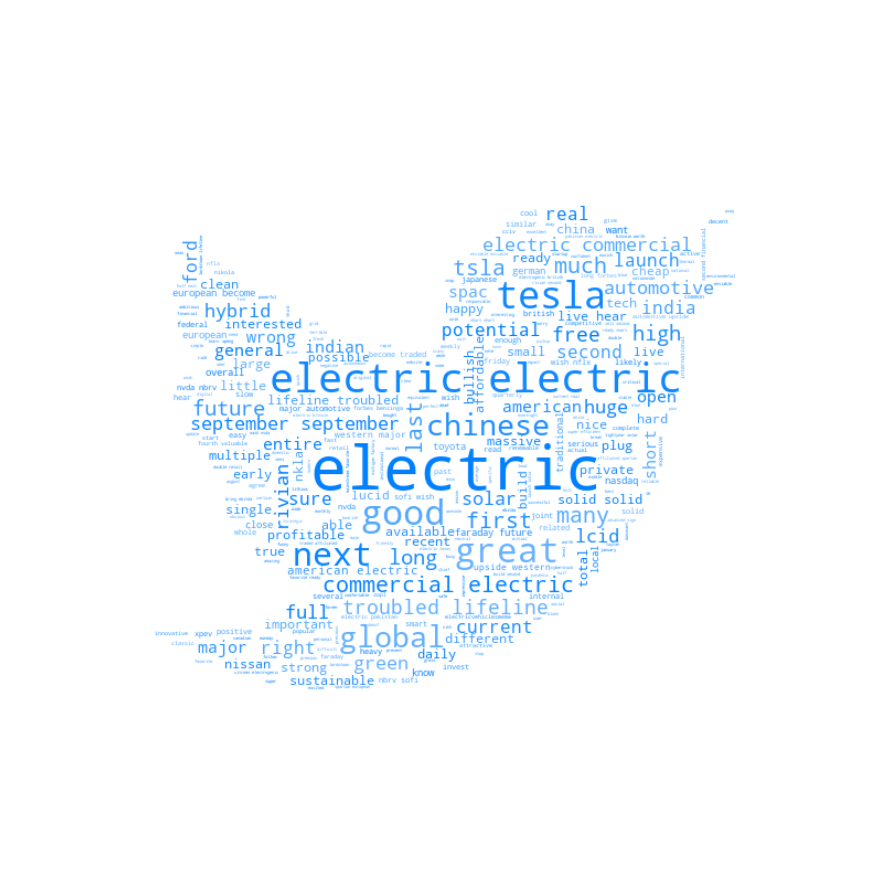

In [59]:
import random # generating random numbers
# Instantiate the Twitter word cloud object
# ref: https://amueller.github.io/word_cloud/auto_examples/masked.html
twitter_wc = WordCloud(background_color='white', max_words=1500, mask=image)

# generate the word cloud
twitter_wc.generate(tweets_long_string)
fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)  # set width
fig.set_figheight(18)  # set height

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

In [423]:
# Combine all words into a list
tweets_long_string = tweets_df['Tweets_Adjectives'].tolist()
tweets_list=[]
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [424]:
# Use the Built-in Python Collections module to determine Word frequency
counts = Counter(tweets_list)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ['Words', 'Count']
df.sort_values(by='Count', ascending=False, inplace=True)
df.head(5)

Words  Count
5   electric   1580
12     tesla    236
75      next    206
30      good    206
26     great    192

### 5. Sentiment Analysis

In this section, the aim was to undertand the sentiment of the Twitter Users while describe Electric Vehicle. 

In [62]:
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [63]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return int(1) if (result == 1) else int(0) if result == 0 else int(-1)

In [64]:
# Sentiment scores dictionaries
tweet_sent = {
    "tweet": [],
    "compound": [],
    "positive": [],
    "neutral": [],
    "negative": [],
    "sentiment": [],
}

# Get sentiment for the tweet
# iterrows() method is used to iterate across the dataframe 
for index, row in tweets_df.iterrows():
    try:
        # Sentiment scoring 
        tweet_sentiment = analyzer.polarity_scores(row["Processed_Tweets"])  # VADER sentiment scores are retrieved for tweets
        tweet_sent["tweet"].append(row["Processed_Tweets"])
        tweet_sent["compound"].append(tweet_sentiment["compound"])
        tweet_sent["positive"].append(tweet_sentiment["pos"])
        tweet_sent["neutral"].append(tweet_sentiment["neu"])
        tweet_sent["negative"].append(tweet_sentiment["neg"])
        tweet_sent["sentiment"].append(get_sentiment(tweet_sentiment["compound"]))
        
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame

tweet_sentiment_df = pd.DataFrame(tweet_sent)
tweet_sentiment_df2 = tweets_df["Processed_Tweets"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [65]:
tweet_sentiment_df2 = tweet_sentiment_df2.reset_index()

In [66]:
del tweet_sentiment_df2["index"]

In [67]:
tweet_date_df = tweets_df[["Date"]]

In [68]:
tweet_date_df.columns = ["date"]

In [69]:
tweet_date_df = tweet_date_df.reset_index()

In [70]:
tweet_date_df.shape

(7890, 2)

In [71]:
del tweet_date_df["index"]

In [72]:
tweet_sentiment_df2 = tweet_sentiment_df2.rename(columns={"0":"polarity","1":"subjectivity"})

In [73]:
tweet_sentiment_df2.columns = ["polarity","subjectivity"]

In [74]:
tweet_sentiment_df2.shape

(7890, 2)

In [75]:
tweet_sentiment_final = pd.concat([tweet_sentiment_df, tweet_sentiment_df2,tweet_date_df],axis=1,join="inner")

In [76]:
tweet_sentiment_final

tweet  compound  positive  \
0     think technology still pretty room improve bes...    0.9118     0.612   
1               compact international wants brake maker    0.0000     0.000   
2     toyota much better volkswagen legacy companies...    0.8442     0.565   
3     toyota much better volkswagen legacy companies...    0.8442     0.476   
4     china venture ambitions beyond electric bloomberg    0.0000     0.000   
...                                                 ...       ...       ...   
7885  dsgt wait good sign motorsport electricvehicle...    0.4404     0.195   
7886  xpdi merger highlights self mined larger hosti...   -0.2263     0.116   
7887     tsla worksport charge automakers toward future    0.0000     0.000   
7888  tsla getting started groundwork laid future gr...    0.6249     0.212   
7889  presentation gaston county board commissioners...    0.8625     0.324   

      neutral  negative  sentiment  polarity  subjectivity       date  
0       0.388     0.000          1  0.516667      0.600000 2021-07-29  
1       1.000     0.000          0  0.100000      0.050000 2021-07-28  
2       0.435     0.000          1  0.750000      0.400000 2021-07-26  
3       0.524     0.000          1  0.571429      0.433333 2021-07-26  
4       1.000     0.000          0  0.000000      0.000000 2021-07-26  
...       ...       ...        ...       ...           ...        ...  
7885    0.805     0.000          1  0.350000      0.362500 2021-07-22  
7886    0.730     0.155         -1  0.000000      0.375000 2021-07-22  
7887    1.000     0.000          0  0.000000      0.125000 2021-07-21  
7888    0.788     0.000          1  0.000000      0.183333 2021-07-21  
7889    0.676     0.000          1  0.244318      0.405114 2021-07-21  

[7890 rows x 9 columns]

In [77]:
## ref : https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
#Count_values for sentiment
count_values_in_column = count_values_in_column(tweet_sentiment_final,"sentiment")
count_values_in_column

Total  Percentage
 1   3930       49.81
 0   2876       36.45
-1   1084       13.74

In [432]:
# create data for Pie Chart
def piechart():
    fig = plt.figure()
    pichart = count_values_in_column
    names= pichart.index
    size=pichart["Percentage"]

    # Create a circle for the center of the plot
    my_circle=plt.Circle( (0,0), 0.7, color="white")
    plt.pie(size, labels=names, colors=["green","yellow","red"])
    p=plt.gcf()
    p.gca().add_artist(my_circle)
#     plt.show()
    plt.close(fig)
    return pn.pane.Matplotlib(fig,tight=True)

Matplotlib(Figure, tight=True)
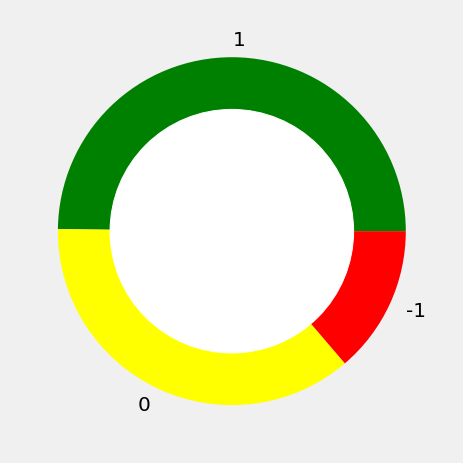

In [445]:
piechart()

In [414]:
# Getting the TF-IDF
# A TfidfVectorizer() instance is created by passing the stopwords in English as a parameter.
vectorizer = TfidfVectorizer(stop_words="english")
X_tweets = vectorizer.fit_transform(tweets_df['Tweets_Lemmatize'])

In [415]:
# Getting matrix info
print(f"Matrix shape: {X_tweets.shape}")
print(f"Total number of tweets: {X_tweets.shape[0]}")
print(f"Total number of unique words (tokens): {X_tweets.shape[1]}")

Matrix shape: (7890, 10283)
Total number of tweets: 7890
Total number of unique words (tokens): 10283


In [416]:
# Retrieve words list from tweets
words_tweets = vectorizer.get_feature_names()
#print(words_tweets)

In [417]:
# Getting the TF-IDF weight of each word in corpus as DataFrame
# The mean value of the TF–IDF for each term is used to create the DataFrame.
words_tweets_df = pd.DataFrame(
    list(zip(words_tweets, np.ravel(X_tweets.mean(axis=0)))), columns=["Word", "TF-IDF"]
)

words_tweets_df = words_tweets_df.sort_values(by=["TF-IDF"], ascending=False)

In [418]:
words_tweets_df = words_tweets_df[:7890]
words_tweets_df = words_tweets_df.reset_index()

In [419]:
words_tweets_df.columns

Index(['index', 'Word', 'TF-IDF'], dtype='object')

In [420]:
words_tweets_df.columns = ["ID", "Word", "TFIDF"]

In [421]:
words_tweets_df = words_tweets_df.drop(columns=["ID"])

In [422]:
words_tweets_df.head()

Word     TFIDF
0     stock  0.028767
1  electric  0.028567
2     tesla  0.021217
3   battery  0.013236
4      sale  0.012429

In [464]:
#Function to ngram
def get_top_n_gram(tweets,ngram_range,n=None):
    countVectorizer = CountVectorizer(ngram_range=ngram_range,stop_words = "english").fit(tweets)
    bag_of_words = countVectorizer.transform(tweets)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in countVectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#n2_bigram
#n2_bigram
n2_bigrams = get_top_n_gram(tweets_df["Processed_Tweets"],(2,2),20)
ndf = pd.DataFrame(n2_bigrams, columns=["Bigrams","Count"]).set_index('Bigrams')

<AxesSubplot:ylabel='Bigrams'>

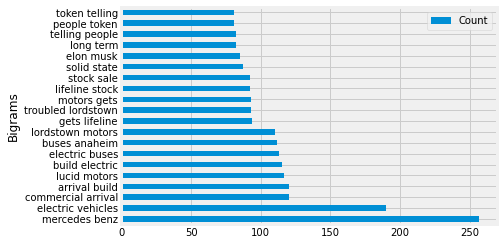

In [484]:
ndf.plot(kind='barh')

In [90]:
tweet_string = ''
for x in tweets_df["Processed_Tweets"]:
    tweet_string += ' ' + x

In [91]:
doc = nlp(tweet_string)

# Render NER visualization with displacy to determine entities for extraction
displacy.render(doc, style='ent')

In [92]:
# Extract geopolitical and organizational entities
entities = [x.text for x in doc.ents if x.label_ in ['GPE', 'ORG']]

In [93]:
# lower and join each entity for word cloud creation
entities = [i.lower().replace(' ', '_') for i in entities]

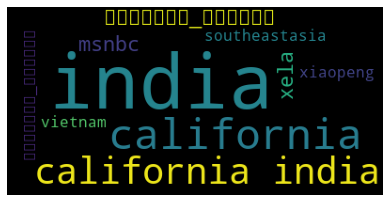

In [94]:
# Generate wordcloud
wc = WordCloud().generate(' '.join(entities))
plt.axis('off')
plt.imshow(wc)

In [95]:
# The Tone Analyzer response is given in JSON format, 
# so the json_normalize function is imported from Pandas to transform the JSON response to a DataFrame.
from pandas import json_normalize

# ToneAnalyzerV3 is the main library to access to the Tone Analyzer via Python.
from ibm_watson import ToneAnalyzerV3

# IAMAuthenticator is used to authenticate your Python application to access the IBM cloud services.
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

import json

In [96]:
# Get the Tone Analyzer API Key and URL
tone_api = os.getenv("IBM_API")
tone_url = os.getenv("IBM_URL")

In [97]:
# Initialize Tone Analyser Client

# Create authentication object
authenticator = IAMAuthenticator(tone_api)

# Create tone_analyzer instance
tone_analyzer = ToneAnalyzerV3(
    version="2017-09-21",
    authenticator=authenticator
)

# Set the service endpoint
tone_analyzer.set_service_url(tone_url)

In [98]:
tweets_sh = tweets_df.iloc[:1000]
tweets_sh = tweets_sh.drop_duplicates('Processed_Tweets', keep='last')

In [99]:
tweet_sh_string = ''
for x in tweets_sh['Processed_Tweets']:
    tweet_sh_string += '. ' + x

In [100]:
# Analyze the text's tone with the 'tone()' method.

# tone(): The general tone analysis, aimed to score tone on short text
# (such as reviews, emails, or social media) or even larger texts (such as articles or blog post)

# it only needs to receive a text to score, however, additional parameters could be used
# https://cloud.ibm.com/apidocs/tone-analyzer?code=python#data-handling

tone_analysis = tone_analyzer.tone( 
    {"text": tweet_sh_string},
    content_type="application/json",
    content_language="en",
    accept_language="en",
).get_result()

# Display tone analysis results
#print(json.dumps(tone_analysis, indent=2))

# On the JSON response, the tone is given for the entire document on the document_tone element 
# as well as for each sentence of the document on the sentences_tone element.

In [101]:
# Sentences Tones
sentences_tone_df = json_normalize(
   data=tone_analysis["sentences_tone"],
    record_path=["tones"],
    meta=["sentence_id", "text"],
)
sentences_tone_df.head()

score     tone_id   tone_name sentence_id  \
0  0.845678         joy         Joy           0   
1  0.842108  analytical  Analytical           0   
2  0.751520   tentative   Tentative           0   
3  0.882284  analytical  Analytical           1   
4  0.607730         joy         Joy           2   

                                                text  
0  . think technology still pretty room improve b...  
1  . think technology still pretty room improve b...  
2  . think technology still pretty room improve b...  
3           compact international wants brake maker.  
4  toyota much better volkswagen legacy companies...

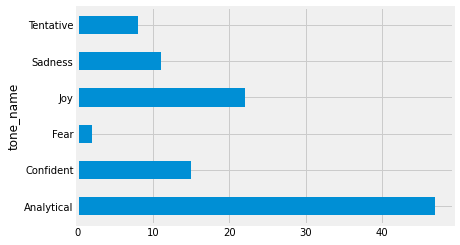

In [102]:
sentences_tone_df.groupby('tone_name')['score'].nunique().plot(kind='barh')
plt.show()

## ___________________

### Get TSLA stock price

In [500]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_API_SECRET")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [504]:
# Set the ticker
ticker = "TSLA"

# Set timeframe to '1D'
timeframe = "1D"

# Set current date and the date from one month ago using the ISO format
current_date = pd.Timestamp(datetime.now(), tz="America/New_York").isoformat()
past_date = pd.Timestamp(datetime.now()- timedelta(30), tz="America/New_York").isoformat()

# Get 4 weeks worth of historical data for AAPL
df_tsla = api.get_barset(
    ticker,
    timeframe,
    limit=None,
    start=past_date,
    end=current_date,
    after=None,
    until=None,
).df


# Drop Outer Table Level
df_tsla = df_tsla.droplevel(axis=1, level=0)

# Use the drop function to drop extra columns
df_tsla = df_tsla.drop(columns=["open", "high", "low", "volume"])

# Since this is daily data, we can keep only the date (remove the time) component of the data
df_tsla.index = df_tsla.index.date


# Use the `pct_change` function to calculate daily returns of AAPL
tsla_returns = df.pct_change().dropna()

# Display sample data
tsla_returns.head()

close
2021-07-09  0.005633
2021-07-12  0.043410
2021-07-13 -0.024216
2021-07-14 -0.023277
2021-07-15 -0.003704

In [505]:
tsla_stock = pd.concat([tsla_returns, df], axis=1, join="outer")

In [506]:
tsla_stock.columns = ["daily_returns", "close"]

In [384]:
tsla_stock.dropna().head(3)

daily_returns   close
2021-07-09       0.005633  656.99
2021-07-12       0.043410  685.51
2021-07-13      -0.024216  668.91

In [385]:
tsla_stock = tsla_stock.reset_index()

In [386]:
tsla_stock.columns = ["date", "daily_returns","close"]

In [387]:
# Merge the Dataframes

In [388]:
sentiment_df = pd.concat([words_tweets_df, tweet_sentiment_final],axis=1, join="inner")
sentiment_df = sentiment_df.drop(columns=["tweet"])
sentiment_df.head(3)

Word     TFIDF  compound  positive  neutral  negative  sentiment  \
0     stock  0.028767    0.9118     0.612    0.388       0.0          1   
1  electric  0.028567    0.0000     0.000    1.000       0.0          0   
2     tesla  0.021217    0.8442     0.565    0.435       0.0          1   

   polarity  subjectivity       date  
0  0.516667          0.60 2021-07-29  
1  0.100000          0.05 2021-07-28  
2  0.750000          0.40 2021-07-26

In [389]:
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"])

In [390]:
tsla_stock["date"] = pd.to_datetime(tsla_stock["date"])

In [391]:
sentiment_df['date']=sentiment_df['date'].apply(lambda x: x.toordinal())

In [392]:
tsla_stock['date']=tsla_stock['date'].apply(lambda x: x.toordinal())

In [393]:
new_df = pd.merge(sentiment_df, tsla_stock, on=["date"], how="inner")
new_df.set_index("date").head()

Word     TFIDF  compound  positive  neutral  negative  sentiment  \
date                                                                           
738000     stock  0.028767    0.9118     0.612    0.388     0.000          1   
738000     start  0.004955    0.0000     0.000    1.000     0.000          0   
738000       say  0.004948    0.2960     0.099    0.901     0.000          1   
738000  earnings  0.004872    0.2263     0.192    0.699     0.109          1   
738000     state  0.004838    0.8020     0.369    0.631     0.000          1   

        polarity  subjectivity  daily_returns   close  
date                                                   
738000  0.516667      0.600000       0.046973  677.36  
738000 -0.100000      0.400000       0.046973  677.36  
738000 -0.050000      0.200000       0.046973  677.36  
738000  0.050000      0.600000       0.046973  677.36  
738000  0.304762      0.714286       0.046973  677.36

In [394]:
new_df = new_df.drop(columns=["Word"])

### Classification

_______________

#### Decision Tree Classifier

In [118]:
new_df

TFIDF  compound  positive  neutral  negative  sentiment  polarity  \
0     0.028767    0.9118     0.612    0.388     0.000          1  0.516667   
1     0.004955    0.0000     0.000    1.000     0.000          0 -0.100000   
2     0.004948    0.2960     0.099    0.901     0.000          1 -0.050000   
3     0.004872    0.2263     0.192    0.699     0.109          1  0.050000   
4     0.004838    0.8020     0.369    0.631     0.000          1  0.304762   
...        ...       ...       ...      ...       ...        ...       ...   
6645  0.000043    0.7351     0.444    0.438     0.119          1  0.500000   
6646  0.000043    0.6369     0.276    0.724     0.000          1  0.500000   
6647  0.000043    0.9260     0.507    0.347     0.147          1  0.408571   
6648  0.000043    0.9153     0.478    0.522     0.000          1  0.362500   
6649  0.000043   -0.5574     0.000    0.865     0.135         -1  0.057143   

      subjectivity    date  daily_returns   close  
0         0.600000  738000       0.046973  677.36  
1         0.400000  738000       0.046973  677.36  
2         0.200000  738000       0.046973  677.36  
3         0.600000  738000       0.046973  677.36  
4         0.714286  738000       0.046973  677.36  
...            ...     ...            ...     ...  
6645      0.266667  737998      -0.020523  644.78  
6646      0.150000  737998      -0.020523  644.78  
6647      0.462857  737998      -0.020523  644.78  
6648      0.595833  737998      -0.020523  644.78  
6649      0.341667  737998      -0.020523  644.78  

[6650 rows x 11 columns]

In [119]:
y = new_df["compound"]
X = new_df.loc[:,(new_df.columns != "compound")]

In [120]:
X.head(3)

TFIDF  positive  neutral  negative  sentiment  polarity  subjectivity  \
0  0.028767     0.612    0.388       0.0          1  0.516667           0.6   
1  0.004955     0.000    1.000       0.0          0 -0.100000           0.4   
2  0.004948     0.099    0.901       0.0          1 -0.050000           0.2   

     date  daily_returns   close  
0  738000       0.046973  677.36  
1  738000       0.046973  677.36  
2  738000       0.046973  677.36

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [122]:
scaler = StandardScaler()

In [123]:
# # Fitting Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [124]:
# # Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [125]:
# # Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [126]:
X_train

TFIDF  positive  neutral  negative  sentiment  polarity  \
3444  0.000064     0.136    0.864     0.000          0  0.000000   
4300  0.000140     0.099    0.720     0.182         -1 -0.083333   
3154  0.000084     0.000    1.000     0.000          0  0.000000   
2292  0.000153     0.086    0.914     0.000          1  0.000000   
230   0.000260     0.000    1.000     0.000          0  0.000000   
...        ...       ...      ...       ...        ...       ...   
6454  0.000100     0.000    1.000     0.000          0  0.000000   
6249  0.000154     0.082    0.918     0.000          1 -0.110714   
4136  0.000282     0.000    1.000     0.000          0  0.000000   
6039  0.000301     0.000    1.000     0.000          0  0.000000   
470   0.000135     0.259    0.741     0.000          1  0.266667   

      subjectivity    date  daily_returns     close  
3444      0.000000  737994      -0.008940  643.3200  
4300      0.033333  738001       0.015118  687.6000  
3154      0.000000  737994      -0.008940  643.3200  
2292      0.100000  737997       0.023270  658.2899  
230       0.000000  738000       0.046973  677.3600  
...            ...     ...            ...       ...  
6454      0.000000  737998      -0.020523  644.7800  
6249      0.383036  737998      -0.020523  644.7800  
4136      0.000000  738001       0.015118  687.6000  
6039      0.000000  737998      -0.020523  644.7800  
470       0.166667  738000       0.046973  677.3600  

[4987 rows x 10 columns]

In [127]:
#The model is trained with the scaled training data.
model = model.fit(X_train_scaled, y_train)

ValueError: Unknown label type: 'continuous'

In [128]:
# After fitting the model, some predictions are made using the scaled testing data.
predictions = model.predict(X_test_scaled)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

In [129]:
y_test.head()

19     -0.1280
2575    0.8360
931     0.4767
4435    0.8720
811     0.0000
Name: compound, dtype: float64

In [130]:
predictions

NameError: name 'predictions' is not defined

In [131]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1","Actual 2"], columns=["Predicted 0", "Predicted 1","Predicted 3"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

NameError: name 'predictions' is not defined

In [132]:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# despite high accuracy, precision and recall for fraudulent loans are relatively low.

Confusion Matrix


NameError: name 'cm_df' is not defined

In [133]:
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1","2"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

# The tree is too deep. However, it can be observed that only one subtree grows.
# This phenomenon occurs when the target classes are imbalanced.
# Having imbalanced target classes is a common problem in classification machine learning algorithms when there is a disproportionate ratio of observations in each class.



AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

In [134]:
#run a grid search to find error rates for max_depths ranging 1-30
grid_param_tree = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31)}

tree.set_param(random_state=0)

grid_search_tree = ms.GridSearchCV(tree, grid_param_tree, scoring='accuracy', cv=5, n_jobs=-1, return_train_score=True)
grid_search_tree.fit(X_train, y_train)

AttributeError: module 'sklearn.tree' has no attribute 'set_param'

In [ ]:
# Linear Regression

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Create a Logistic Regression Model
# Using a logistic regression model, we try to predict the class, purple or yellow, with the coordinates of a point.
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

# Fit (train) or model using the training data
classifier.fit(X_train, y_train)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [136]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

NameError: name 'classifier' is not defined

In [137]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

# it seems that the model does reasonably well.
# While there are some false positives, the vast majority of data points are classified correctly

NameError: name 'predictions' is not defined

In [138]:
from sklearn.metrics import classification_report

target_names = ["Positive", "Neutral","Negative"]
print(classification_report(y_test, predictions, target_names=target_names))

NameError: name 'predictions' is not defined

In [139]:
# Kmeans 

In [140]:
model = KMeans(n_clusters=4, random_state=1)

In [141]:
model.fit(new_df)

KMeans(n_clusters=4, random_state=1)

In [142]:
new_df.head()

TFIDF  compound  positive  neutral  negative  sentiment  polarity  \
0  0.028767    0.9118     0.612    0.388     0.000          1  0.516667   
1  0.004955    0.0000     0.000    1.000     0.000          0 -0.100000   
2  0.004948    0.2960     0.099    0.901     0.000          1 -0.050000   
3  0.004872    0.2263     0.192    0.699     0.109          1  0.050000   
4  0.004838    0.8020     0.369    0.631     0.000          1  0.304762   

   subjectivity    date  daily_returns   close  
0      0.600000  738000       0.046973  677.36  
1      0.400000  738000       0.046973  677.36  
2      0.200000  738000       0.046973  677.36  
3      0.600000  738000       0.046973  677.36  
4      0.714286  738000       0.046973  677.36

In [143]:
# Get predictions
predictions = model.predict(new_df)
print(predictions)

[3 3 3 ... 2 2 2]


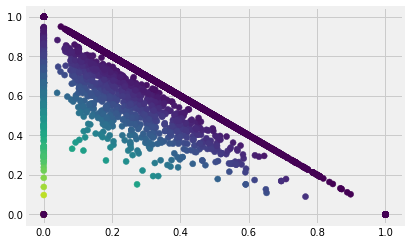

In [144]:
plt.scatter(x=new_df["positive"], y=new_df["neutral"], c=new_df["negative"])

In [145]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Fit the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [146]:
# elbow method
# Looking for the best k

inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(new_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

:Curve   [k]   (inertia)

In [147]:
# Combination Sampling SMOTEENN

In [148]:
y = new_df["sentiment"]
X = new_df.loc[:,(new_df.columns != "sentiment")]

In [149]:
Counter(y)

Counter({1: 3306, 0: 2412, -1: 932})

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [151]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
Counter(y_resampled)

Counter({-1: 3266, 0: 3226, 1: 3235})

In [152]:
# Fit a Logistic regression model using random undersampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [153]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[233,   0,   0],
       [611,   0,   0],
       [819,   0,   0]], dtype=int64)

In [154]:
# Calculate the Balanced Accuracy Score
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.3333333333333333

In [155]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

         -1       0.14      1.00      0.00      0.25      0.00      0.00       233
          0       0.00      0.00      1.00      0.00      0.00      0.00       611
          1       0.00      0.00      1.00      0.00      0.00      0.00       819

avg / total       0.02      0.14      0.86      0.03      0.00      0.00      1663



C:\Users\danie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model Test and Train
__________

#### Naive Bayes

In [156]:
tweet_sentiment_final

tweet  compound  positive  \
0     think technology still pretty room improve bes...    0.9118     0.612   
1               compact international wants brake maker    0.0000     0.000   
2     toyota much better volkswagen legacy companies...    0.8442     0.565   
3     toyota much better volkswagen legacy companies...    0.8442     0.476   
4     china venture ambitions beyond electric bloomberg    0.0000     0.000   
...                                                 ...       ...       ...   
7885  dsgt wait good sign motorsport electricvehicle...    0.4404     0.195   
7886  xpdi merger highlights self mined larger hosti...   -0.2263     0.116   
7887     tsla worksport charge automakers toward future    0.0000     0.000   
7888  tsla getting started groundwork laid future gr...    0.6249     0.212   
7889  presentation gaston county board commissioners...    0.8625     0.324   

      neutral  negative  sentiment  polarity  subjectivity       date  
0       0.388     0.000          1  0.516667      0.600000 2021-07-29  
1       1.000     0.000          0  0.100000      0.050000 2021-07-28  
2       0.435     0.000          1  0.750000      0.400000 2021-07-26  
3       0.524     0.000          1  0.571429      0.433333 2021-07-26  
4       1.000     0.000          0  0.000000      0.000000 2021-07-26  
...       ...       ...        ...       ...           ...        ...  
7885    0.805     0.000          1  0.350000      0.362500 2021-07-22  
7886    0.730     0.155         -1  0.000000      0.375000 2021-07-22  
7887    1.000     0.000          0  0.000000      0.125000 2021-07-21  
7888    0.788     0.000          1  0.000000      0.183333 2021-07-21  
7889    0.676     0.000          1  0.244318      0.405114 2021-07-21  

[7890 rows x 9 columns]

In [157]:
X_train, X_test, y_train, y_test = train_test_split(tweet_sentiment_final["tweet"],\
                                                    tweet_sentiment_final["sentiment"],\
                                                    random_state=1)

In [158]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english')


In [159]:
tfidf_train=tfidf_vectorizer.fit_transform(X_train)

In [160]:
tfidf_test=tfidf_vectorizer.transform(X_test)

In [161]:
# Vectorizing and applying TF-IDF

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 78.71%


In [162]:
Naive = MultinomialNB()
Naive.fit(tfidf_train,y_train)
# predict the labels on validation dataset
predictions_NB = Naive.predict(tfidf_test)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

Naive Bayes Accuracy Score ->  68.82919412062849


In [163]:
# sentiment_df["compound"].plot()

In [164]:
sentiment_df.shape

(7890, 10)

In [165]:
X = new_df.drop('compound',axis=1)
y = new_df['compound'].tolist()

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=78)

In [167]:
X.describe()

TFIDF     positive      neutral     negative    sentiment  \
count  6650.000000  6650.000000  6650.000000  6650.000000  6650.000000   
mean      0.000371     0.163641     0.772809     0.056185     0.356992   
std       0.000963     0.194378     0.225880     0.120802     0.714091   
min       0.000042     0.000000     0.000000     0.000000    -1.000000   
25%       0.000068     0.000000     0.639000     0.000000     0.000000   
50%       0.000122     0.111000     0.805000     0.000000     0.000000   
75%       0.000300     0.277000     1.000000     0.055750     1.000000   
max       0.028767     1.000000     1.000000     1.000000     1.000000   

          polarity  subjectivity           date  daily_returns        close  
count  6650.000000   6650.000000    6650.000000    6650.000000  6650.000000  
mean      0.090106      0.304471  737998.293383       0.009233   662.936978  
std       0.246686      0.310006       2.587515       0.019621    18.254371  
min      -1.000000      0.000000  737992.000000      -0.020523   643.320000  
25%       0.000000      0.000000  737997.000000      -0.008940   646.970000  
50%       0.000000      0.250000  737999.000000       0.015118   658.289900  
75%       0.200000      0.523810  738001.000000       0.023270   687.600000  
max       1.000000      1.000000  738001.000000       0.046973   687.600000

In [168]:
scaler = StandardScaler()

In [169]:
X_scaler = scaler.fit(X_train)

In [170]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Random Forest Regressor

In [171]:
from sklearn.ensemble import RandomForestRegressor

In [172]:
# from sklearn.ensemble import RandomForestClassifier

In [173]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)

In [174]:
X = new_df.drop('compound',axis=1)
y = new_df['compound'].tolist()

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=78)

In [176]:
X.describe()

TFIDF     positive      neutral     negative    sentiment  \
count  6650.000000  6650.000000  6650.000000  6650.000000  6650.000000   
mean      0.000371     0.163641     0.772809     0.056185     0.356992   
std       0.000963     0.194378     0.225880     0.120802     0.714091   
min       0.000042     0.000000     0.000000     0.000000    -1.000000   
25%       0.000068     0.000000     0.639000     0.000000     0.000000   
50%       0.000122     0.111000     0.805000     0.000000     0.000000   
75%       0.000300     0.277000     1.000000     0.055750     1.000000   
max       0.028767     1.000000     1.000000     1.000000     1.000000   

          polarity  subjectivity           date  daily_returns        close  
count  6650.000000   6650.000000    6650.000000    6650.000000  6650.000000  
mean      0.090106      0.304471  737998.293383       0.009233   662.936978  
std       0.246686      0.310006       2.587515       0.019621    18.254371  
min      -1.000000      0.000000  737992.000000      -0.020523   643.320000  
25%       0.000000      0.000000  737997.000000      -0.008940   646.970000  
50%       0.000000      0.250000  737999.000000       0.015118   658.289900  
75%       0.200000      0.523810  738001.000000       0.023270   687.600000  
max       1.000000      1.000000  738001.000000       0.046973   687.600000

In [177]:
scaler = StandardScaler()

In [178]:
X_scaler = scaler.fit(X_train)

In [179]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [180]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [181]:
predictions = rf_model.predict(X_test_scaled)

In [182]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

ValueError: continuous is not supported

In [ ]:
# Confusion Matrix
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


### SVM
_____________

In [ ]:
from sklearn import svm

In [183]:
X_train, X_test, y_train, y_test = train_test_split(tweet_sentiment_final["tweet"],\
                                                    tweet_sentiment_final["sentiment"],\
                                                    random_state=1)

In [184]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english')

In [185]:
tfidf_train=tfidf_vectorizer.fit_transform(X_train) 

In [186]:
tfidf_test=tfidf_vectorizer.transform(X_test)

In [187]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(tfidf_train,y_train)

NameError: name 'svm' is not defined

In [188]:
# predict the labels on validation dataset
predictions_SVM = SVM.predict(tfidf_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

NameError: name 'SVM' is not defined

In [189]:
# def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
#    inputs = Input(name='inputs',shape=[max_len])#step1
#    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
#    layer = LSTM(64)(layer) #step3
#    layer = Dense(256,name='FC1')(layer) #step4
#    layer = Activation('relu')(layer) # step5
#    layer = Dropout(0.5)(layer) # step6
#    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
#    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
#    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
#    return model #function returning the value when we call it

In [190]:
# model = tensorflow_based_model() # here we are calling the function of created model
# model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [191]:
# history=model.fit(X_train,y_train,batch_size=80,epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data
# print('Training finished !!')

In [193]:
#########################################################################################################################

In [ ]:
# Stock grpahs for dashboard

In [ ]:
# Adding machine learning model for just TSLA stock

In [507]:
import yfinance as yf

In [508]:
TSLA = yf.Ticker('TSLA')

In [509]:
tsla_graph = TSLA.history(period="5y").drop(["Dividends","Stock Splits"],axis = 1)
tsla_graph

Open        High         Low       Close    Volume
Date                                                                
2016-08-08   45.599998   45.919998   45.217999   45.231998  11318000
2016-08-09   45.363998   46.307999   45.330002   45.816002  11039000
2016-08-10   45.647999   45.973999   44.924000   45.130001  11691500
2016-08-11   45.234001   45.514000   44.681999   44.981998   9404500
2016-08-12   45.082001   45.330002   44.807999   45.122002   9067500
...                ...         ...         ...         ...       ...
2021-08-02  700.000000  726.940002  698.400024  709.669983  33615800
2021-08-03  719.000000  722.650024  701.010010  709.739990  21620300
2021-08-04  711.000000  724.900024  708.929993  710.919983  17002600
2021-08-05  716.000000  720.950012  711.409973  714.630005  12919600
2021-08-06  711.900024  716.330017  697.630005  699.099976  15576200

[1259 rows x 5 columns]

In [540]:
def graphs():
    fig = plt.figure(figsize=(15, 5));
    plt.subplot(1,2,1);
    plt.plot(tsla_graph.Open.values, color='red', label='open')
    plt.plot(tsla_graph.Close.values, color='green', label='close')
    plt.plot(tsla_graph.Low.values, color='blue', label='low')
    plt.plot(tsla_graph.High.values, color='black', label='high')
    plt.title('stock price')
    plt.xlabel('time [days]')
    plt.ylabel('price')
    plt.legend(loc='best')
    #plt.show()

    plt.subplot(1,2,2);
    plt.plot(tsla_graph.Volume.values, color='black', label='volume')
    plt.title('stock volume')
    plt.xlabel('time [days]')
    plt.ylabel('volume')
    plt.legend(loc='best');
    plt.close(fig)
    return pn.pane.Matplotlib(fig,tight=True)

In [194]:
#########################################################################################################################

In [230]:
## Dashboard & Panel 

In [282]:
import panel as pn
from panel.interact import interact
from panel import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
pn.extension('plotly') ###make sure this is above the hvplot
import hvplot.pandas
%matplotlib inline

In [395]:
team_background = pn.Column(
        '##Tweet Your Stock Price Movement',
        '###Meet the Team!',
        '###Syeda Rezwana Hasan',
        pn.pane.JPG('https://media-exp1.licdn.com/dms/image/C5603AQFlx1MSe4bP9w/profile-displayphoto-shrink_200_200/0/1606848981542?e=1633564800&v=beta&t=XT_KV6bEN2qsZtL5p1MsxxcVdD2fMyrYOheaVQAgQVc', width=350),
        'https://www.linkedin.com/in/syeda-rezwana-hasan/',
        '##Daniel R. Faulks',
        pn.pane.JPG('https://www.advancentx.org/uploads/1/3/5/2/135224485/cr-0023065-daniel-faulks_orig.jpg', width=350),
        'linkedin profile: https://www.linkedin.com/in/daniel-faulks-33b10316/',
        '##Brock Freeman',
        pn.pane.JPG('https://media-exp1.licdn.com/dms/image/C4E03AQFqyzEEFSsQwg/profile-displayphoto-shrink_200_200/0/1623945646537?e=1633564800&v=beta&t=r7TDR_nwyZzh-qPcujdVsltMUwCHnIrQcdjPJCjYxhM', width=350),
         'linkedin profile: https://www.linkedin.com/in/brock-freeman-9aa171152/',
       '##Samson',
    
     

)

In [425]:
king_of_tweets = pn.Column(
    '#THE KING OF STOCK TWEETS!!!!',
    pn.pane.JPG('https://www.teslaoracle.com/wp-content/uploads/2021/03/Elon-Musk-Technoking.jpg', width=500),
        
)

In [439]:
twitter_data = pn.Column(
    '#Twitter Data',
    pn.pane.PNG(r'C:\Users\danie\smu_second_project\EV_Sentiment_Trading\wordcloud.png', width=750),
    '##Word Count',
    df.head(10),
    '',
)

In [542]:
sentiment_analysis = pn.Column(
    '##Tweet Sentiment Analysis',
    'In this section, the aim was to undertand the sentiment of the Twitter Users while describe Electric Vehicle.',
    count_values_in_column,
    piechart(),
    '',
    '##TD-IDF',
    '',
    'Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining',
    words_tweets_df.head(10),                  
)

In [552]:
stock_analysis = pn.Column(
    '#Stock Analysis Using Machine Learning',
    graphs(),
    '##Classification',
    new_df.head(10),
    
)

In [553]:
conclusion = pn.Column(
    '##Conclusion',
    
                     
                     
)

In [554]:
project_dashboard = pn.Tabs(
    ('Team Members', team_background),
    ('King of Tweets', king_of_tweets),
    ('Twitter Data', twitter_data),
    ('Sentiment Analysis', sentiment_analysis),
    ("Stock Prediction" , stock_analysis),
    ("Conclusion" , conclusion),
    
)

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Markdown(str)
        [3] JPG(str, width=350)
        [4] Markdown(str)
        [5] Markdown(str)
        [6] JPG(str, width=350)
        [7] Markdown(str)
        [8] Markdown(str)
        [9] JPG(str, width=350)
        [10] Markdown(str)
        [11] Markdown(str)
    [1] Column
        [0] Markdown(str)
        [1] JPG(str, width=500)
    [2] Column
        [0] Markdown(str)
        [1] PNG(str, width=750)
        [2] Markdown(str)
        [3] DataFrame(DataFrame)
        [4] Markdown(str)
        [5] Matplotlib(Figure, tight=True)
    [3] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] DataFrame(DataFrame)
        [3] Matplotlib(Figure, tight=True)
        [4] Markdown(str)
        [5] Markdown(str)
        [6] Markdown(str)
        [7] Markdown(str)
        [8] DataFrame(DataFrame)
    [4] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure, tight=True)
        [2] Markdown(str)
        [3] DataFrame(DataFrame)
    [5] Column
        [0] Markdown(str)
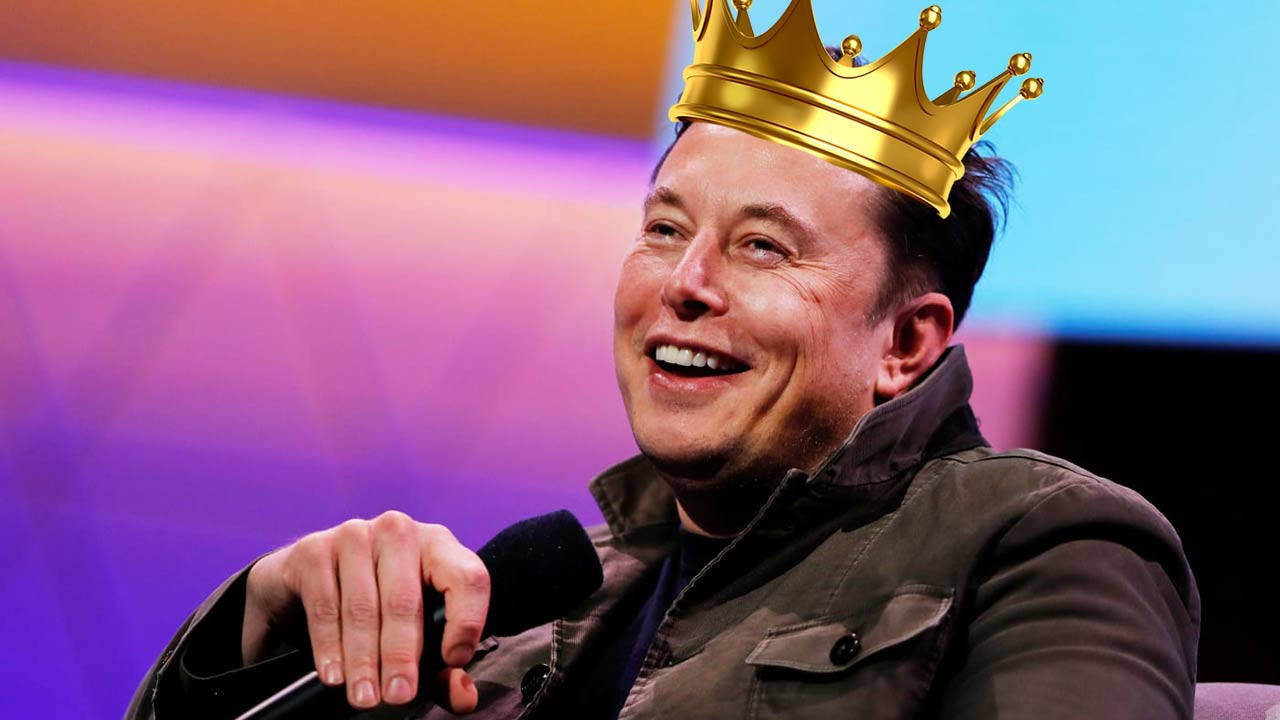
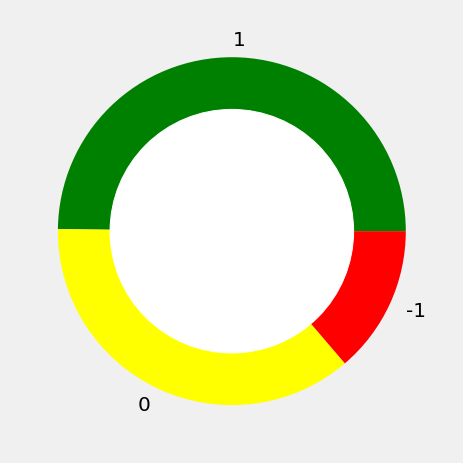
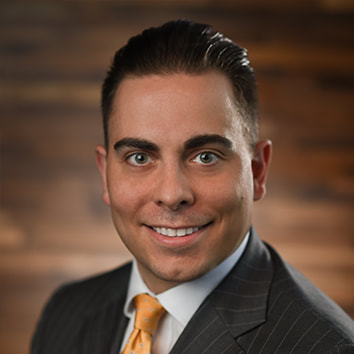
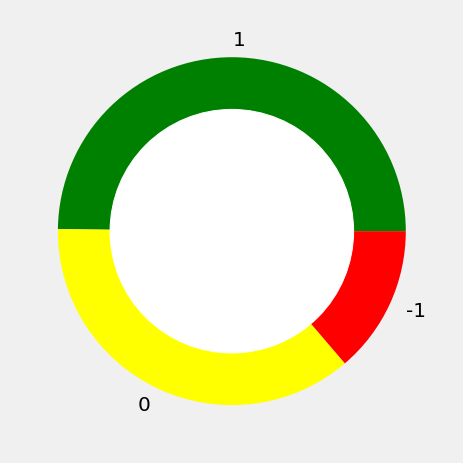
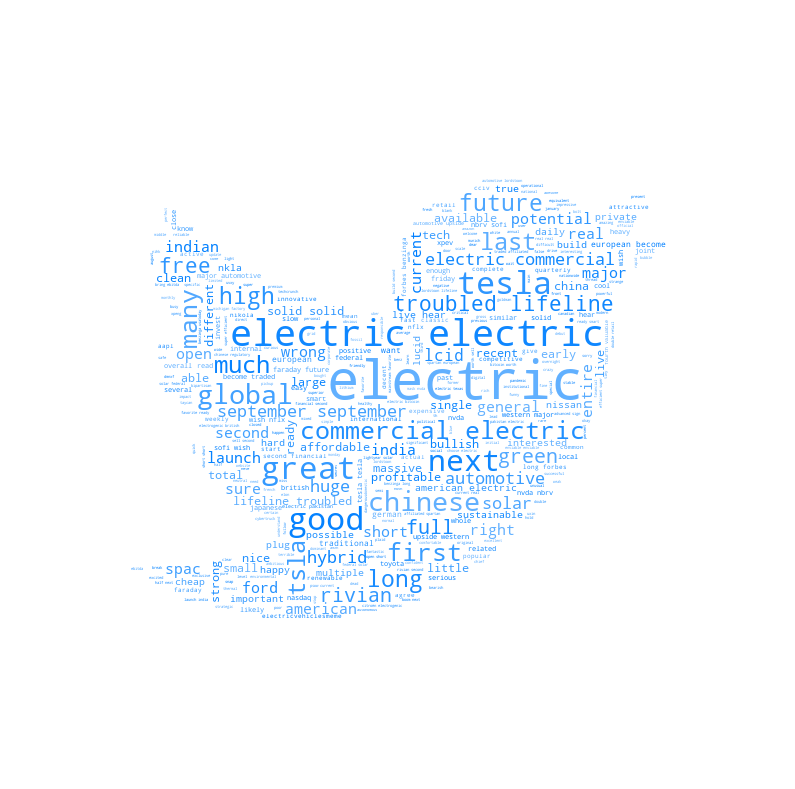
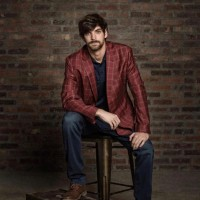
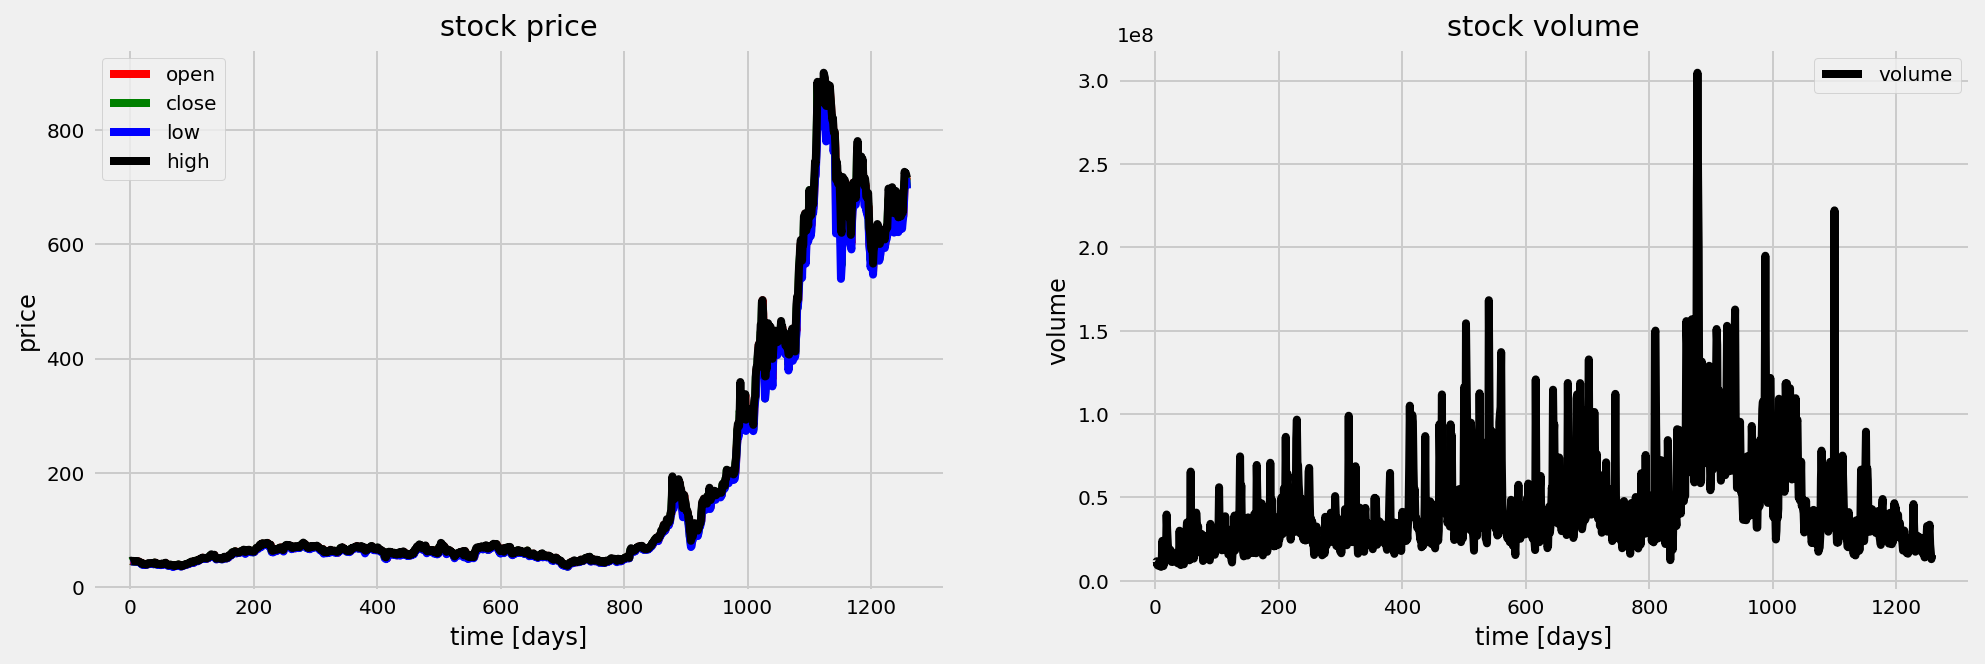
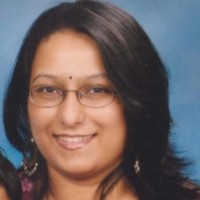

In [555]:
project_dashboard.servable()

In [ ]:
# panel serve

In [ ]:
# C:\Users\danie\smu_second_project/EV_Sentiment_Trading/Twitter_Sentiment_Analysis.ipynb --log-level debug --show